In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd, numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from nltk.stem.porter import PorterStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from nltk.tokenize import TreebankWordTokenizer, RegexpTokenizer, \
PunktSentenceTokenizer, WordPunctTokenizer

from sklearn.preprocessing import LabelEncoder

from stop_words import get_stop_words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fetch_data():
    train = pd.read_csv('./csv/train_data.csv', encoding = 'UTF-8')
    test = pd.read_csv('./csv/test_data.csv', encoding = 'UTF-8')
    return train, test

In [3]:
def feature_target_seperator(df):
    X = df.iloc[:,0]
    y = df.iloc[:,1:]
    return X,y

In [4]:
def reverse_OHE(df):
    df = df.iloc[:,1:].astype(str).replace({'T':1,'F':0})
    df = df.idxmax(axis=1)
    df = LabelEncoder().fit_transform(df)
    return df

In [5]:
def word_cloud(X, max_font_size=40):
    if (any(isinstance(row, unicode) for row in X_train)):
        X = X.apply(lambda row: row.split(' '))
    text = []
    for sentence in X:
        text.extend(sentence)
    textall = " ".join(text)
    wordcloud = WordCloud(max_font_size = max_font_size).generate(textall)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [6]:
### preprocess 
def preprocess(listlikeobj, stop_words = []):
    en_stop = get_stop_words('en')
    en_stop.extend(stop_words)
    tokenizer = TreebankWordTokenizer()
    p_stemmer = PorterStemmer()
    
    listlikeobj = listlikeobj.apply(lambda row: row.lower())
    listlikeobj = listlikeobj.apply(lambda row: tokenizer.tokenize(row))
    listlikeobj = listlikeobj.apply(lambda row: [i for i in row if i not in en_stop])
    listlikeobj = listlikeobj.apply(lambda row: [p_stemmer.stem(i) for i in row])
    return listlikeobj

In [7]:
def vectorize(X_train, X_test, vectorizer = CountVectorizer(ngram_range=(1,2)),max_df = 0.5, min_df = 3):
    X_train = pd.Series([' '.join(sentence) for  sentence in X_train])
    X_test = pd.Series([' '.join(sentence) for  sentence in X_test])
    vectorizer.fit(X_train)
    train_dtm = vectorizer.transform(X_train)
    test_dtm = vectorizer.transform(X_test)
    return train_dtm, test_dtm

In [8]:
def grid_obj_creator(classifier, parameters, X, y):
    acc_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(classifier, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X, y)
    return grid_obj 


In [9]:
def model_fit(train_dtm, y_train, model = MultinomialNB(fit_prior = False)):
    model.fit(train_dtm, y_train)
    return model

In [10]:
def model_predict(model, test_dtm, y_test):
    y_predictions = model.predict(test_dtm)
    print accuracy_score(y_test, y_predictions)
    print classification_report(y_test, y_predictions)
    print confusion_matrix(y_test, y_predictions)

### Iteration 1

In [11]:
train, test = fetch_data()
train = train.sample(frac = 1)
test = test.sample(frac = 1)

In [12]:
train

,message,food,recharge,support,reminders,travel,nearby,movies,casual,other
24040,Send me bawarchi parcel section menu,T,F,F,F,F,F,F,F,F
3138,i want a honeymoon tour in 29 december to 3 ja...,F,F,F,F,T,F,F,F,F
10384,book table,T,F,F,F,F,F,F,F,F
8964,do u set me a reminder,F,F,F,T,F,F,F,F,F
20264,as i have booked an appointment for electrician,F,F,T,F,F,F,F,F,F
30429,I wanna buy a phone ranging between 10 thousand,F,F,F,F,F,F,F,F,T
7917,any offer for electricity bill ?,F,T,F,F,F,F,F,F,F
15579,remind me to recharge ajji phone,F,F,F,T,F,F,F,F,F
18812,how i can pay by paytm,T,T,F,F,T,F,T,F,F
17954,book my flight to delhi of 8th march,F,F,F,F,T,F,F,F,F


In [13]:
X_train, y_train = feature_target_seperator(train)
y_train

,food,recharge,support,reminders,travel,nearby,movies,casual,other
24040,T,F,F,F,F,F,F,F,F
3138,F,F,F,F,T,F,F,F,F
10384,T,F,F,F,F,F,F,F,F
8964,F,F,F,T,F,F,F,F,F
20264,F,F,T,F,F,F,F,F,F
30429,F,F,F,F,F,F,F,F,T
7917,F,T,F,F,F,F,F,F,F
15579,F,F,F,T,F,F,F,F,F
18812,T,T,F,F,T,F,T,F,F
17954,F,F,F,F,T,F,F,F,F


In [14]:
X_test, y_test = feature_target_seperator(test)
y_test

,food,recharge,support,reminders,travel,nearby,movies,casual,other
6032,F,F,F,F,F,F,F,F,T
2699,F,F,F,T,F,F,F,F,F
7496,F,F,F,F,T,F,F,F,F
853,F,F,F,F,F,F,F,F,T
1920,F,F,F,F,T,F,F,F,F
1544,F,F,F,T,F,F,F,F,F
1406,F,F,F,F,T,F,F,F,F
6324,F,F,F,F,F,F,F,T,F
8116,F,F,F,F,F,F,F,T,F
7774,F,F,F,F,F,F,F,T,F


In [15]:
y_train = reverse_OHE(y_train)
y_train

array([4, 7, 4, ..., 7, 0, 0])

In [16]:
y_test = reverse_OHE(y_test)
y_test

array([3, 5, 7, ..., 2, 0, 0])

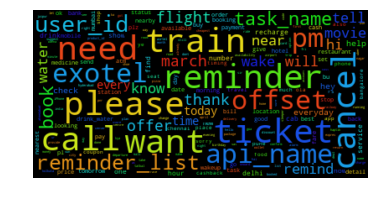

In [17]:
word_cloud(X_train)

In [18]:
custom_stop_words = ['thank', 'hey', 'please', 'hi', 'pm', 'user_id', 'api_name', 'need', 'pm', 'product_id', 'task_name', 'api_name']

In [19]:
X_train = preprocess(X_train, stop_words= custom_stop_words)

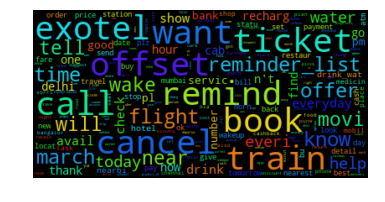

In [20]:
word_cloud(X_train)

In [21]:
X_test = preprocess(X_test)

In [22]:
train_dtm, test_dtm = vectorize(X_train, X_test)
train_dtm

<40659x90448 sparse matrix of type '<type 'numpy.int64'>'
	with 303528 stored elements in Compressed Sparse Row format>

In [23]:
print X_train.shape
print X_test.shape
print train_dtm.shape
print test_dtm.shape
print y_train.shape
print y_test.shape

(40659,)
(10000,)
(40659, 90448)
(10000, 90448)
(40659,)
(10000,)


In [24]:
# X_test = X_test.apply(lambda row: [i for i in row if i not in custom_stop_words])

In [25]:
params_grid = {'alpha': [0.25,0.5,0.75,1,1.25], 'fit_prior':[False, True]}

In [26]:
nb = MultinomialNB()

In [27]:
model = grid_obj_creator(nb, params_grid, train_dtm, y_train)

In [28]:
model.best_estimator_

MultinomialNB(alpha=0.75, class_prior=None, fit_prior=False)

In [29]:
model1 = model_fit(train_dtm, y_train, model = model.best_estimator_)

In [30]:
model_predict(model1, test_dtm, y_test)

0.7901
             precision    recall  f1-score   support

          0       0.88      0.76      0.82      3250
          1       0.79      0.73      0.76       436
          2       0.64      0.72      0.68       703
          3       0.87      0.70      0.78      1620
          4       0.73      0.85      0.78       992
          5       0.82      0.86      0.84       879
          6       0.67      0.51      0.58       269
          7       0.72      0.93      0.81      1851

avg / total       0.80      0.79      0.79     10000

[[2485   42   57   73  142  105   24  322]
 [   7  317   22    6    2    0    2   80]
 [  41    6  509   37   31    8    8   63]
 [ 119   18  103 1135  103   29   21   92]
 [  32    5   40   14  847    7    3   44]
 [  58    6    3    8   10  754    1   39]
 [  17    2   36   26    9    7  136   36]
 [  53    3   30    8   22   10    7 1718]]


### Iteration 2
#### Using Random Forest Classifier

In [33]:
params_grid = {'n_estimators': [200,400], 'max_depth': [2,5], 'min_samples_split': [2,4], 'random_state':[0]}

In [ ]:
random_forest = RandomForestClassifier()
model = grid_obj_creator(random_forest, params_grid, train_dtm, y_train)

In [ ]:
model.best_estimator_

In [ ]:
model2 = model_fit(train_dtm, y_train, model = model.best_estimator_)

In [ ]:
model_predict(model2, test_dtm, y_test)